In [ ]:
# Student Performance Data Visualization
# This notebook demonstrates data exploration and visualization using the new modular structure

import sys
import os
sys.path.append(os.path.join('..', 'src'))

from src.data_processor import DataProcessor
from src.visualizer import Visualizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data using the DataProcessor class
processor = DataProcessor("../data/StudentPerformanceFactors.csv")
processor.load_data()
processor.explore_data()

# Get the dataset for direct manipulation
dataset = processor.dataset

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

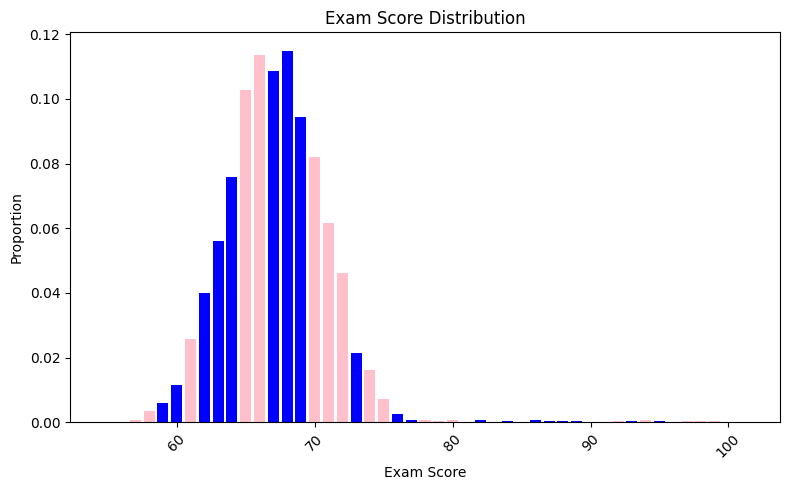

In [ ]:
# Create visualizer and generate data distribution plots
visualizer = Visualizer("../outputs/images")
visualizer.plot_data_distribution(dataset)

# Also create a custom distribution plot
scores_distribution = dataset['Exam_Score'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
plt.bar(scores_distribution.index, scores_distribution.values, color=['blue', 'pink'])
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

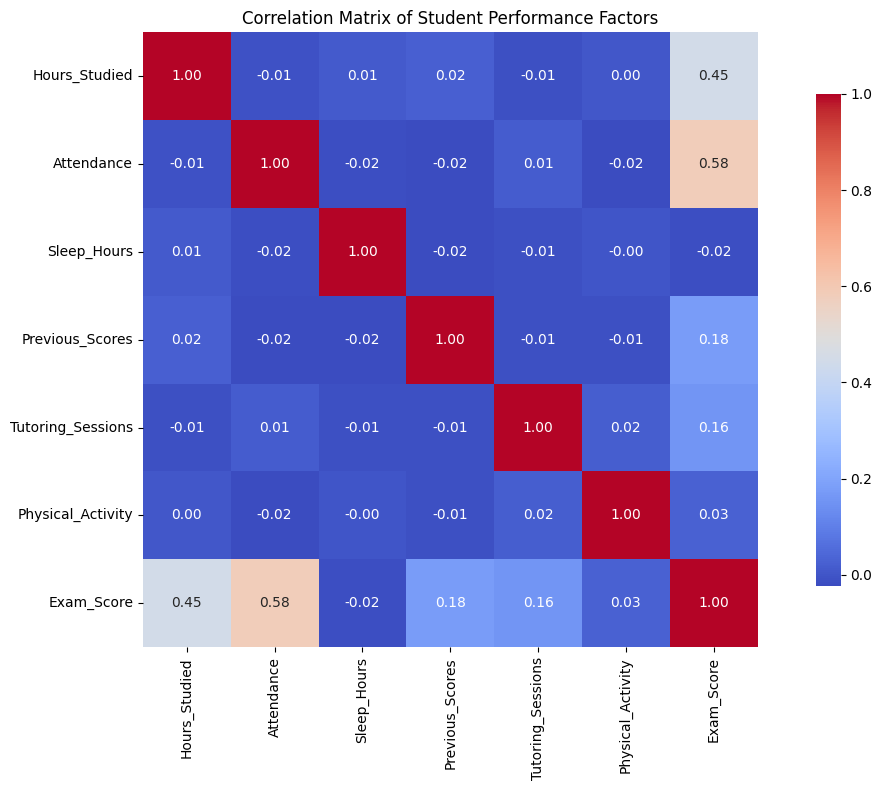

In [ ]:
# Generate correlation matrix using the visualizer
visualizer.plot_correlation_matrix(dataset)

# Also create a custom correlation plot for comparison
correlation_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Student Performance Factors")
plt.tight_layout()
plt.show()

In [ ]:
# Categorical Analysis
# Analyze how categorical variables relate to exam scores
X, y = processor.prepare_features()

if processor.categorical_features:
    print("Categorical features found:", processor.categorical_features)
    visualizer.plot_categorical_analysis(dataset, processor.categorical_features)
else:
    print("No categorical features found in the dataset")